In [ ]:
from __future__ import print_function

import pandas as pd
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def wordCharacterToUnicode(arr, arrOutput):
  for i in range(0, len(arr)):
    temp = arr[i];
    count = 0
    for j in temp:
      arrOutput[i][count]= ord(j) - 2400
      count = count + 1

def labelToDataframe(arry, arryoutput):
  for i in range (0, len(arry)):
    for j in range (0, len(arry[i])):
      temp = arry[i][j]
      if (temp!= None):
        arryoutput.loc[i][temp] = 1

data = pd.read_csv('inputbn.csv', sep=',', engine='python', header=0)
data = data.to_numpy()

x_sample = data[:,0]
y_sample = data[:,1:10]
temp = np.zeros(shape = (100, 46))

X = np.zeros(shape = (100, 10))
wordCharacterToUnicode(x_sample, X)
temp = np.zeros(shape = (100, 46))
df = pd.DataFrame(temp, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
labelToDataframe(y_sample, df)
print(X[0:5])
print(df.head(5))

trainX, testX, trainy, testy = train_test_split(X, df, test_size=0.2)

[[ 76.  82.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 53.  69.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 39.  82.  95.  86.   0.   0.   0.   0.   0.   0.]
 [ 76.  94.  82.  95.  53.  94.   0.   0.   0.   0.]
 [ 78.  72. 103.   0.   0.   0.   0.   0.   0.   0.]]
     অ    আ    ই    ঈ    উ    ঊ    ঋ  ...    শ    ষ    স    হ    ড়    ঢ়    য়
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 46 columns]


In [ ]:
max_features = 801
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 100

model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=10))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(46))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainy, batch_size=batch_size, epochs=epochs, validation_data=(testX, testy), verbose=2)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            40050     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 250)            37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
_

In [ ]:
# evaluate the keras model
loss, accuracy = model.evaluate(X, df)
print("\nLoss: %.3f, Accuracy: %.2f%%" % (loss, accuracy*100))

100/100 [==============================] - 0s 168us/step

Loss: 0.043, Accuracy: 99.04%


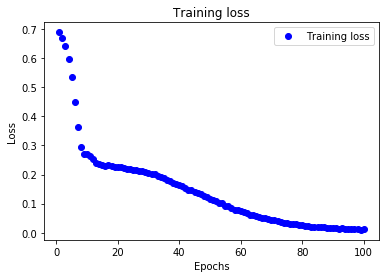

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
loss = history_dict['loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

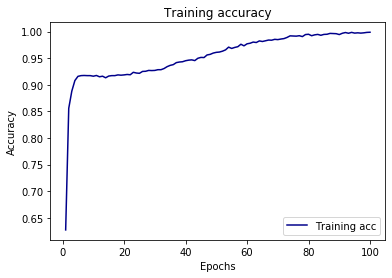

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, color='darkblue', label='Training acc' )
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
tempString = 'সরকারি'
Y = [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
tempInput = np.zeros(shape=(1,10))
count = 0
for i in tempString:
  tempInput[0][count]= ord(i) - 2400
  count = count + 1
print(tempInput)
probabilities = model.predict(tempInput)
accuracy = np.mean(probabilities == Y)
prediction = pd.DataFrame(probabilities, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
print(prediction)

[[88. 80. 53. 94. 80. 95.  0.  0.  0.  0.]]
          অ         আ        ই  ...         ড়             ঢ়         য়
0  0.058183  0.998239  0.61212  ...  0.000055  1.985383e-08  0.000062

[1 rows x 46 columns]
